<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [36]:
results_df.describe()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
count,1000000,1000000,1000000,992801,999924,937526,930757,1000000,1000000,1000000,1000000
unique,1000000,8888,8891,5036,735827,77,77,103,53,1354,8690
top,41e03734cd00e6fa7573f57e16ac4fbaa7a73cbd,2019-04-27T19:00:00.000,2019-06-06T00:00:00.000,900,0,8,8,5,0,2.55,7.55
freq,1,301,7268,1907,163,164305,155565,211879,811116,737176,155033


In [14]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              992652 non-null object
trip_miles                999918 non-null object
pickup_community_area     938052 non-null object
dropoff_community_area    931177 non-null object
fare                      1000000 non-null object
tip                       1000000 non-null object
additional_charges        1000000 non-null object
trip_total                1000000 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','pickup_community_area','dropoff_community_area','fare','tip','additional_charges','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [39]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,3b017ac598832d41d3cdbe464c84eaf341d6b9fa,2019-06-05 22:30:00,2019-06-05 22:45:00,972,4.747616,32.0,7.0,10.0,0.0,2.55,12.55
1,3b017b89acea021c084623eb13131ca74cfba4b8,2019-06-24 18:30:00,2019-06-24 19:00:00,2173,10.166629,62.0,NaN,20.0,0.0,2.55,22.55
2,3b017bc515ae429622a81c96c52d288a851a5a38,2019-04-30 18:45:00,2019-04-30 19:15:00,1366,7.385844,32.0,3.0,15.0,4.0,2.55,21.55
3,3b017bd5ed093aa8c9b9733e051de0e8ff4cd099,2019-06-25 06:45:00,2019-06-25 07:15:00,1348,5.334453,71.0,44.0,12.5,0.0,2.55,15.05
4,3b017bdea68424b3092239c2788b1ab61936abef,2019-05-10 17:15:00,2019-05-10 17:30:00,918,2.121624,32.0,33.0,5.0,0.0,2.55,7.55


In [0]:
results_df['trip_seconds']= results_df['trip_seconds'].astype(float)

In [42]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992801 non-null float64
trip_miles                999924 non-null float64
pickup_community_area     937526 non-null float64
dropoff_community_area    930757 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [44]:
#results_df.drop(columns='trip_id')

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0,10.0,0.0,2.55,12.55
1,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN,20.0,0.0,2.55,22.55
2,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0,15.0,4.0,2.55,21.55
3,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0,12.5,0.0,2.55,15.05
4,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0,5.0,0.0,2.55,7.55
...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-03 10:00:00,2019-04-03 10:30:00,1772.0,18.070170,8.0,76.0,25.0,0.0,7.55,32.55
999996,2019-05-07 08:45:00,2019-05-07 09:00:00,1556.0,2.454644,7.0,28.0,12.5,0.0,0.00,12.50
999997,2019-05-09 06:30:00,2019-05-09 06:30:00,180.0,0.674738,19.0,19.0,2.5,0.0,2.55,5.05
999998,2019-05-04 15:30:00,2019-05-04 16:15:00,3137.0,16.983653,8.0,76.0,25.0,5.0,0.00,30.00


In [45]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,3b017ac598832d41d3cdbe464c84eaf341d6b9fa,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0,10.0,0.0,2.55,12.55
1,3b017b89acea021c084623eb13131ca74cfba4b8,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN,20.0,0.0,2.55,22.55
2,3b017bc515ae429622a81c96c52d288a851a5a38,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0,15.0,4.0,2.55,21.55
3,3b017bd5ed093aa8c9b9733e051de0e8ff4cd099,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0,12.5,0.0,2.55,15.05
4,3b017bdea68424b3092239c2788b1ab61936abef,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0,5.0,0.0,2.55,7.55


In [0]:
results_df.to_csv('rideshare1.csv', index=False)

In [47]:
!pwd

/content


In [48]:
! ~

/bin/bash: /root: Is a directory


In [53]:
ride_data = results_df.iloc[:200001,1:7]
ride_data.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
0,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0
1,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN
2,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0
3,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0
4,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


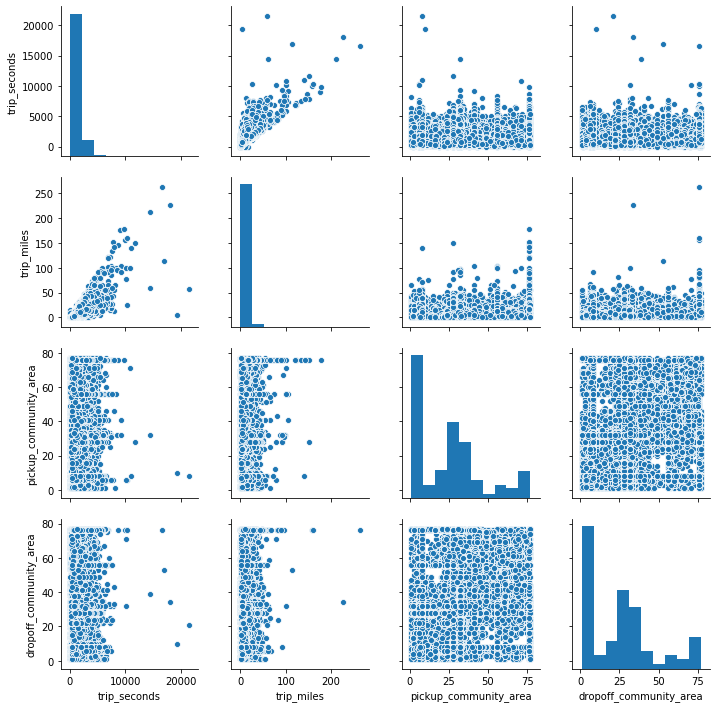

In [54]:
sns.pairplot(ride_data)

In [55]:
ride_data.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area
trip_seconds,1.000000,0.817619,0.201505,0.232667
trip_miles,0.817619,1.000000,0.296859,0.342950
pickup_community_area,0.201505,0.296859,1.000000,0.288050
dropoff_community_area,0.232667,0.342950,0.288050,1.000000


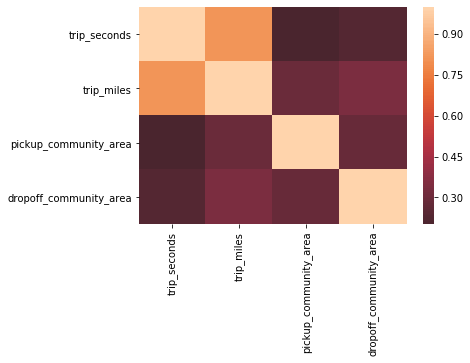

In [56]:
sns.heatmap(ride_data.corr(), center=0)

In [0]:
results_df['start_date'] = [d.date() for d in results_df['trip_start_timestamp']]
results_df['start_time'] = [d.time() for d in results_df['trip_start_timestamp']]

In [58]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time
0,3b017ac598832d41d3cdbe464c84eaf341d6b9fa,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0,10.0,0.0,2.55,12.55,2019-06-05,22:30:00
1,3b017b89acea021c084623eb13131ca74cfba4b8,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN,20.0,0.0,2.55,22.55,2019-06-24,18:30:00
2,3b017bc515ae429622a81c96c52d288a851a5a38,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0,15.0,4.0,2.55,21.55,2019-04-30,18:45:00
3,3b017bd5ed093aa8c9b9733e051de0e8ff4cd099,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0,12.5,0.0,2.55,15.05,2019-06-25,06:45:00
4,3b017bdea68424b3092239c2788b1ab61936abef,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0,5.0,0.0,2.55,7.55,2019-05-10,17:15:00


In [59]:
results_df['end_date'] = [d.date() for d in results_df['trip_end_timestamp']]
results_df['end_time'] = [d.time() for d in results_df['trip_end_timestamp']]
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time,end_date,end_time
0,3b017ac598832d41d3cdbe464c84eaf341d6b9fa,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0,10.0,0.0,2.55,12.55,2019-06-05,22:30:00,2019-06-05,22:45:00
1,3b017b89acea021c084623eb13131ca74cfba4b8,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN,20.0,0.0,2.55,22.55,2019-06-24,18:30:00,2019-06-24,19:00:00
2,3b017bc515ae429622a81c96c52d288a851a5a38,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0,15.0,4.0,2.55,21.55,2019-04-30,18:45:00,2019-04-30,19:15:00
3,3b017bd5ed093aa8c9b9733e051de0e8ff4cd099,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0,12.5,0.0,2.55,15.05,2019-06-25,06:45:00,2019-06-25,07:15:00
4,3b017bdea68424b3092239c2788b1ab61936abef,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0,5.0,0.0,2.55,7.55,2019-05-10,17:15:00,2019-05-10,17:30:00


In [61]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992801 non-null float64
trip_miles                999924 non-null float64
pickup_community_area     937526 non-null float64
dropoff_community_area    930757 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
start_date                1000000 non-null object
start_time                1000000 non-null object
end_date                  1000000 non-null object
end_time                  1000000 non-null object
dtypes: datetime64[ns](2), float64(8), object(5)
memory usage: 114.4+ MB


In [0]:
results_df['start_time'] = pd.to_datetime(results_df['start_time'])

In [65]:
results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total,start_date,start_time,end_date,end_time
0,3b017ac598832d41d3cdbe464c84eaf341d6b9fa,2019-06-05 22:30:00,2019-06-05 22:45:00,972.0,4.747616,32.0,7.0,10.0,0.0,2.55,12.55,2019-06-05,2019-06-05,2019-06-05,22:45:00
1,3b017b89acea021c084623eb13131ca74cfba4b8,2019-06-24 18:30:00,2019-06-24 19:00:00,2173.0,10.166629,62.0,NaN,20.0,0.0,2.55,22.55,2019-06-24,2019-06-24,2019-06-24,19:00:00
2,3b017bc515ae429622a81c96c52d288a851a5a38,2019-04-30 18:45:00,2019-04-30 19:15:00,1366.0,7.385844,32.0,3.0,15.0,4.0,2.55,21.55,2019-04-30,2019-04-30,2019-04-30,19:15:00
3,3b017bd5ed093aa8c9b9733e051de0e8ff4cd099,2019-06-25 06:45:00,2019-06-25 07:15:00,1348.0,5.334453,71.0,44.0,12.5,0.0,2.55,15.05,2019-06-25,2019-06-25,2019-06-25,07:15:00
4,3b017bdea68424b3092239c2788b1ab61936abef,2019-05-10 17:15:00,2019-05-10 17:30:00,918.0,2.121624,32.0,33.0,5.0,0.0,2.55,7.55,2019-05-10,2019-05-10,2019-05-10,17:30:00


In [66]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              992801 non-null float64
trip_miles                999924 non-null float64
pickup_community_area     937526 non-null float64
dropoff_community_area    930757 non-null float64
fare                      1000000 non-null float64
tip                       1000000 non-null float64
additional_charges        1000000 non-null float64
trip_total                1000000 non-null float64
start_date                1000000 non-null object
start_time                1000000 non-null datetime64[ns]
end_date                  1000000 non-null object
end_time                  1000000 non-null object
dtypes: datetime64[ns](3), float64(8), object(4)
memory usage: 114.4+ MB
